In [14]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

In [15]:
# Exercise 1
def get_column(data, index):
  result = [row[index] for row in data]
  return result

def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
  N = len(data)

  # get feats numerically
  tv_data = get_column(data, 0)
  radio_data = get_column(data, 1)
  newspaper_data = get_column(data, 2)
  sales_data = get_column(data, 3)

  # building X input and y output for training
  X = [tv_data, radio_data, newspaper_data]
  y = sales_data
  return X,y

In [19]:
def initialize_params():
    w1, w2, w3 = 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344
    b = 0
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

def compute_loss_mse(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_wi(xi, y, y_hat):
    return 2 * (y_hat - y) * xi

def compute_gradient_b(y, y_hat):
    return 2 * (y_hat - y)

def update_weight_wi(w, dw, lr):
    return w - lr * dw

def update_weight_b(b, db, lr):
    return b - lr * db

def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            loss = compute_loss_mse(y_hat, y)
            loss_total += loss

            dw1 = compute_gradient_wi(x1, y, y_hat)
            dw2 = compute_gradient_wi(x2, y, y_hat)
            dw3 = compute_gradient_wi(x3, y, y_hat)
            db = compute_gradient_b(y, y_hat)

            dw1_total += dw1
            dw2_total += dw2
            dw3_total += dw3
            db_total += db

        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)

        losses.append(loss_total / N)

    return w1, w2, w3, b, losses

w1: 0.06710990754044266, w2: 0.15756173831487585, w3: 0.029619799386084403, b: 0.015537523797089711
5.809778260904676


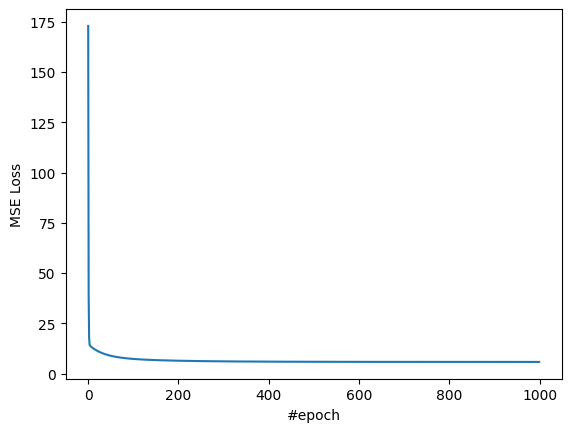

In [21]:
X, y = prepare_data('advertising.csv')  # Load the data

# Train the model with batch gradient descent
w1, w2, w3, b, losses = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)

# Print final weights and loss
print(f"w1: {w1}, w2: {w2}, w3: {w3}, b: {b}")
print(losses[-1])  # Print the last recorded loss

# Plot the loss curve
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MSE Loss")
plt.show()

In [22]:
 # Question 11:
 X,y = prepare_data('advertising.csv')
 # using MSE loss
 (w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000,lr=1e-5)
 print(w1,w2,w3)

0.06710990754044266 0.15756173831487585 0.029619799386084403


[12.537758993110772, 12.306786418928269, 12.075813844745774, 11.844841270563279, 11.613868696380775, 11.382896122198277, 11.151923548015775, 10.92095097383327, 10.689978399650776, 10.459005825468275, 10.228033251285774, 9.99706067710327, 9.76608810292077, 9.535115528738277, 9.304142954555772, 9.073170380373279, 8.842197806190775, 8.611225232008282, 8.380252657825782, 8.149280083643282, 7.9183075094607815, 7.687334935278275, 7.456362361095777, 7.2253897869132775, 6.99441721273078, 6.763444638548282, 6.532472064365782, 6.303696928779395, 6.081189938366895, 5.8586829479543985, 5.639518193954374, 5.433280404481873, 5.227042615009367, 5.02627351250224, 4.8386930358577445, 4.660172871694349, 4.487604353415483, 4.332324542879863, 4.195409847013496, 4.064693875461415, 3.956540575164051, 3.864482068331549, 3.778410233557584, 3.706484966712123, 3.6375251151200856, 3.575952255926808, 3.5242288100202717, 3.483688061341444, 3.4455647874889426, 3.4090701904365743, 3.3760863653040722, 3.3432516667412

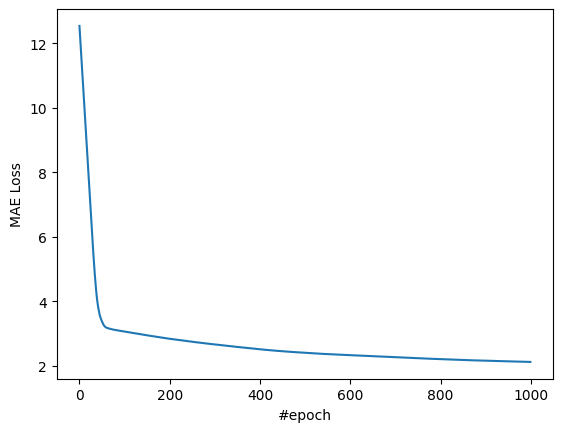

In [25]:
# linear_regression for N-samples-training with MAE loss function
def initialize_params():
    w1, w2, w3 = 0.016992259082509283, 0.0070783670518262355, -0.002307860847821344
    b = 0
    return w1, w2, w3, b

def predict(x1, x2, x3, w1, w2, w3, b):
    return w1 * x1 + w2 * x2 + w3 * x3 + b

def compute_loss_mae(y, y_hat):
    return np.abs(y - y_hat)

def compute_gradient_wi_mae(xi, y, y_hat):
    return -np.sign(y - y_hat) * xi

def compute_gradient_b_mae(y, y_hat):
    return -np.sign(y - y_hat)

def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # get a sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # compute loss
            loss = compute_loss_mae(y, y_hat)

            # accumulate loss
            loss_total += loss

            # compute gradient w1, w2, w3, b
            dw1_total += compute_gradient_wi_mae(x1, y, y_hat)
            dw2_total += compute_gradient_wi_mae(x2, y, y_hat)
            dw3_total += compute_gradient_wi_mae(x3, y, y_hat)
            db_total += compute_gradient_b_mae(y, y_hat)

        # update parameters
        w1 -= lr * dw1_total / N
        w2 -= lr * dw2_total / N
        w3 -= lr * dw3_total / N
        b -= lr * db_total / N

        # logging
        losses.append(loss_total / N)

    return (w1, w2, w3, b, losses)

(w1,w2,w3,b, losses) = implement_linear_regression_nsamples(X,y, epoch_max=1000, lr=1e-5)
print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()